In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

# DataLoad: Load banglore home prices into a dataframe

In [2]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
#Drop features that are not required to build our model

df2 = df1.drop(['area_type','society','balcony','availability'], axis = 'columns')
df2.shape

(13320, 5)

In [8]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


#  Data Cleaning: Handle NA values

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df2.shape

(13320, 5)

In [11]:
df3 = df2.dropna()
print(df3)

                       location       size total_sqft  bath   price
0      Electronic City Phase II      2 BHK       1056   2.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                      Kothanur      2 BHK       1200   2.0   51.00
...                         ...        ...        ...   ...     ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00
13316             Richards Town      4 BHK       3600   5.0  400.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00
13319              Doddathoguru      1 BHK        550   1.0   17.00

[13246 rows x 5 columns]


In [12]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df3.shape

(13246, 5)

#  Features Engineering

In [14]:
#Add new features(integer) for bhk (Bedroom Hall Kitchen)

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\heman\AppData\Local\Temp/ipykernel_12732/702743103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
#Explore total_sqft features

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [19]:
#For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850

df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [20]:
(2100+2850)/2

2475.0

# Feature Engineering

In [21]:
#Add new features called price per square feet

df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [23]:
df5.to_csv("bhp.csv", index=False)

#  Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [24]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [25]:
location_stats.values.sum()

13200

In [26]:
len(location_stats[location_stats>10])

240

In [27]:
len(location_stats)

1287

In [28]:
len(location_stats[location_stats<=10])

1047

# Dimensionality Reduction

In [29]:
Introduction to Dimensionality Reduction Technique

what is Dimensionality Reduction?

The number of input features, variables, or columns present in a given dataset
is known as dimensionality, and the process to reduce these features is called 
dimensionality reduction.

A dataset contains a huge number of input features in various cases, which
makes the predictive modeling task more compicatied. Becasue it is very 
difficult to visualize or make predictions for the training dataset with a
high numbers of features, for such cases, dimensionality reduction technqiues are
required to use.

Dimensionality reduction technique can be defined as, "it is way of converting
the higher dimensions dataset into lesser dimensions dataset ensuring that it
provides similar information". There techniques are widely used in machine
learning for obtaining a better fit predictive model while solving the 
classification and regression problmes.

It is commonly used in the fields that deal with high-dimensional data, such
as speech recognition, signal processing, bioinformatics, etc. It can also be
used for data visualization, noise reduction, cluster analysis etc.

SyntaxError: invalid syntax (Temp/ipykernel_12732/973530283.py, line 1)

### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [30]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [31]:
len(df5.location.unique())

1287

In [32]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [33]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Removal Using Business logic

### As a data scientist when you have a conversation with your business manager(who has expertise in real estate), he will tell you that normally square ft per bedromm is 300(i.e 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft.

In [34]:
df5[df5.total_sqft/df5.bhk>300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Check above data points. we have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. There are clear data errors that can be removed safely.

In [35]:
df5.shape

(13200, 7)

In [36]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [37]:
#Outlier Removal Using Standard Deviation and Mean

In [38]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

### Here we find that mini price per sqft is 267 rs/sqft whereas max is 12000000, thus shows a wide variation in propery prices. We should remove outliers per location using mean and one standar deviation

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

In [42]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
#df7.shape

In [43]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10237,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10238,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10239,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10240,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


### Let's check if for a given location how does the 2BHK and 3 BHK property prices look like

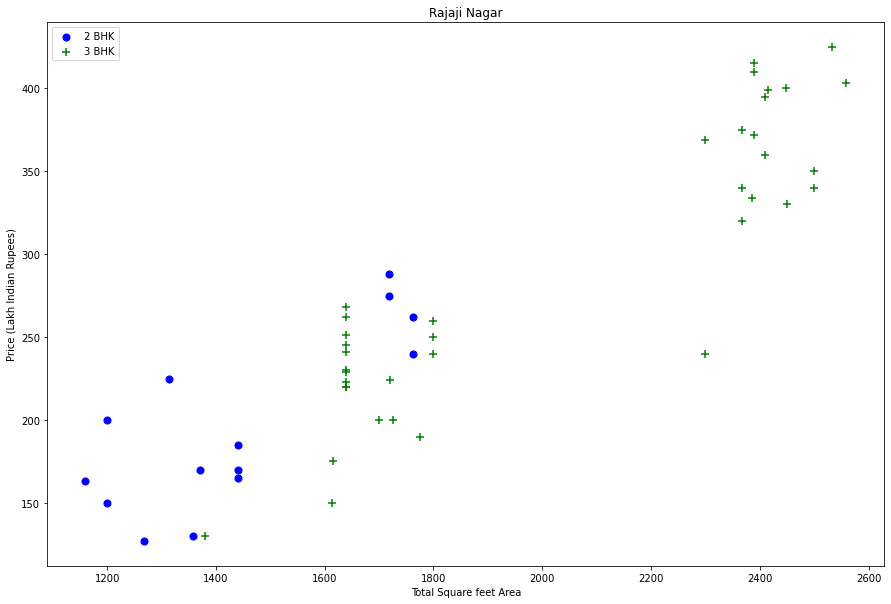

In [40]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label='3 BHK', s=50)
    plt.xlabel("Total Square feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, "Rajaji Nagar")

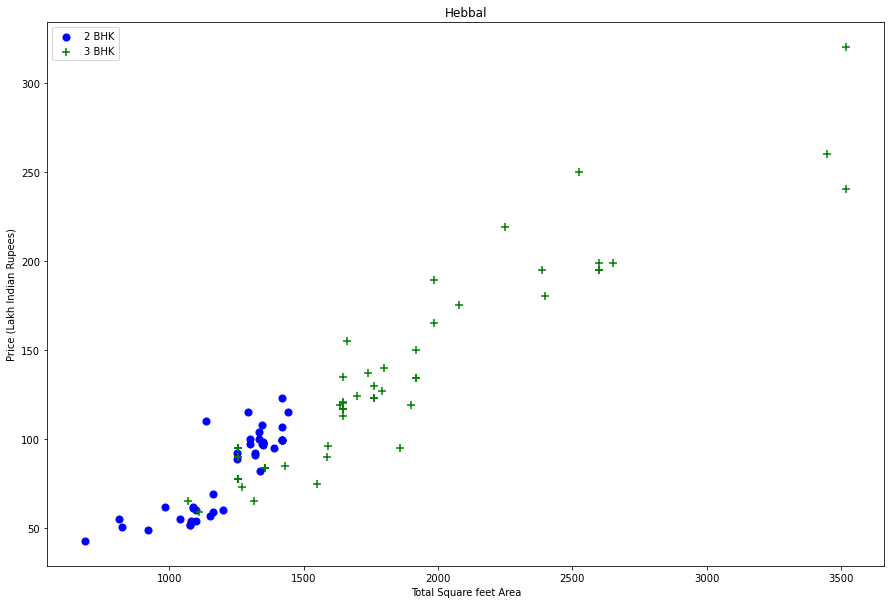

In [41]:
plot_scatter_chart(df7, "Hebbal")

### We should also remove properties where for same location, the price of(for example) 3 bedroom apartment is less than 2 bedroom apartment(With same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e




In [ ]:
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
            
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhl_outliers(df7)
#df8 =df7.copy()

df8.shape

### Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties 

In [ ]:
plot_scatter_chart(df8, "Rajaji Nagar")

In [ ]:
plot_scatter_chart(df8, "Hebbal")

### Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers functions

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per Square feet")
plt.ylabel("Count")

###  Outliers Removal Using Bathrooms Features 

In [ ]:
df8.bath.unique()

In [ ]:
plt.hist(Df8.bath,rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df8[df8.bath>10]

In [ ]:
df8[df8.bath>df8.bhk+2]

### Again the business manager has a conversation with you(i.e a data scientist) that if you have 4  bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed.

In [ ]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

In [ ]:
df9.head(2)

In [ ]:
df10 = df0.drop(['size', 'price_per_sqft'], axis = 'columns')
df10.head(3)

# Use One Hot Encoding for Location

In [ ]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

In [ ]:
df11 = pd.concat([df10, dummies.drop('other', axis = 'columns')], axis = 'columns')
df11.head()

In [ ]:
df12 = df11.drop('location' axis='columns')
df12.head(2)

# Build a Model Now..

In [ ]:
df12.shape

In [ ]:
X = df12.drop(['Price'], axis = 'columns')
X.head(3)

In [ ]:
X.shape

In [ ]:
y = df12.price
y.head(3)

In [ ]:
len(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)


In [ ]:
from sklearn.linear_model import LinearRegression
lr_Clf = LinearRegression()
lr_Clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

# Use K Flod cross validation to measure accuracy of our Linear Regression model 

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size= 0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score, We will use GridSearchCV for this purpose.

# Find best model using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params':{
                'normalize':[True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter:'['best', 'random']
            }
        }
    }
    scores = []
    cv = ShufflesSplit(n_spluts = 5, test_size= 0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(confih['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

### Based in above results we can say that LinearRegression gives that best score. Hence we will use that.

# Test the model for few properties

In [ ]:
def perdict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0]= sqft
    x[1]= bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index]=1
    return lr_clf.perdict([x])[0]

In [ ]:
predict_prices('1st Phare JP Nagar', 1000,2,2)

In [ ]:
predict_price('1st Phase JP Nagar', 1000,3,3)

In [ ]:
predict_price('Indira Nagar', 1000,2,2)

In [ ]:
predict_price('Indira Nagar', 1000,3,3)